In [2]:
# lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

# homemade
from features import tautil
from labeling import labeling

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import FinanceDataReader as fdr
df_ = fdr.DataReader('005930','2010-1-1','2021-6-1')
df = tautil.ohlcv(df_)

In [5]:
close =df.close

In [6]:
windows=[60]

In [9]:
trend_scanning_regime_q3 = []
for i in windows:
    trend_scanning_regime_q3.append(labeling.trend_scanning_label(close,window=i,q=3)[0].abs())

In [10]:
trend_scanning_q3 = []
for i in windows:
    trend_scanning_q3.append(labeling.trend_scanning_label(close,window=i,q=3)[0])

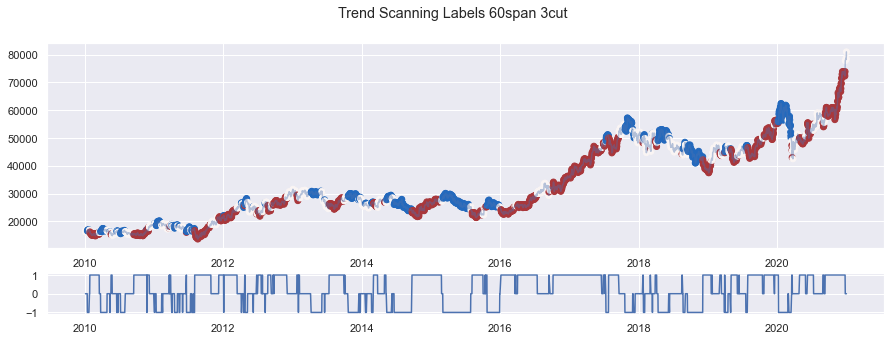

In [14]:
for j in range(len(windows)):
    y = trend_scanning_q3[j][:'2020']
    i = windows[j]
    f, (a0, a1) = plt.subplots(2, gridspec_kw={'height_ratios': [5, 1]}, figsize=(15,5))
    f.suptitle("Trend Scanning Labels {}span 3cut".format(i))
    a0.plot(close[:'2020'],alpha=0.4)
    a0.scatter(close[:'2020'].index,close[:'2020'],c=y, cmap='vlag')
    a1.plot(y.fillna(0))
    f.show()

In [12]:
print(trend_scanning_long_q3[1].dropna().value_counts())

NameError: name 'trend_scanning_long_q3' is not defined

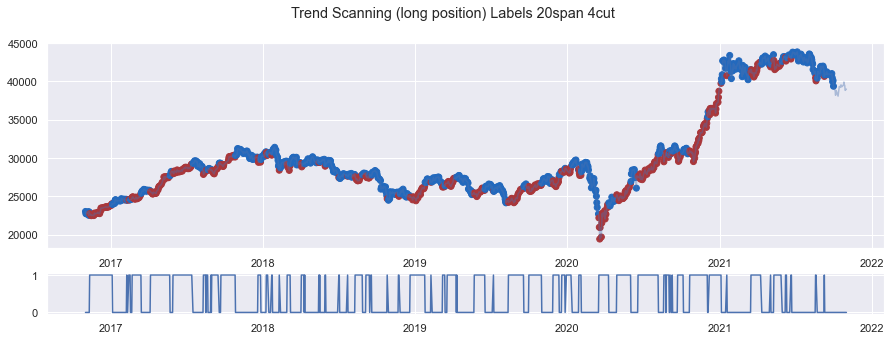

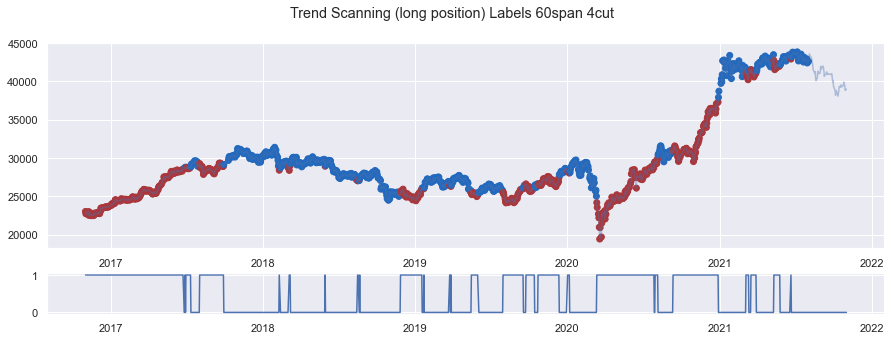

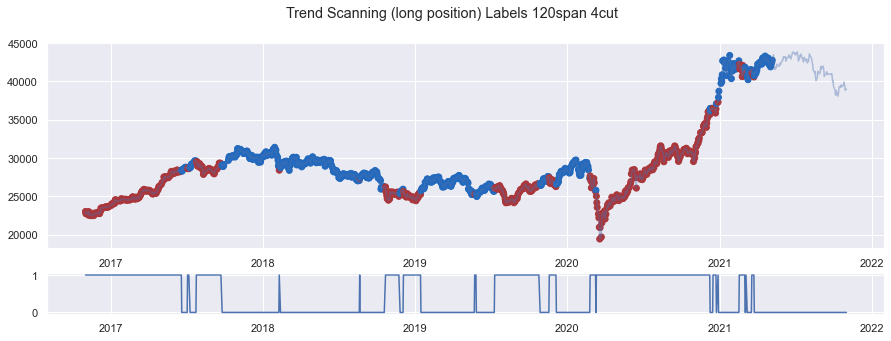

In [75]:
for j in range(len(windows)):
    y = np.sign(trend_scanning_q3[j]-1)+1
    i = windows[j]
    f, (a0, a1) = plt.subplots(2, gridspec_kw={'height_ratios': [5, 1]}, figsize=(15,5))
    f.suptitle("Trend Scanning (long position) Labels {}span 4cut".format(i))
    a0.plot(close,alpha=0.4)
    a0.scatter(close.index,close,c=y, cmap='vlag')
    a1.plot(y.fillna(0))
    f.savefig("c:image/labeling/trend_scanning_long_pos_{}.png".format(i))
    f.show()